
===> Open Command propmt and then execute the following command to install sklearn Module

---> pip install scikit-learn

-----------------------------------------------
dataset can be downloaded from: https://datahub.io/machine-learning/iris

In this program, we are going to use iris dataset.And this dataset Split into training(70%) and test set(30%).

The iris dataset conatins the following features

---> sepal length (cm)
---> sepal width (cm)
---> petal length (cm)
---> petal width (cm)

The Sample data in iris dataset format is  [5.4 3.4 1.7 0.2]

Where    5.4 ---> sepal length (cm)
        3.4 ---> sepal width (cm)
        1.7 ---> petal length (cm)
        0.2 ---> petal width (cm)


In [ ]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split



In [ ]:
# Loading data
import pandas as pd
 
# Reading the CSV file
df = pd.read_csv("/content/iris_csv.csv")
data_iris=df
# Printing top 5 rows
df.head()



sepallength  sepalwidth  petallength  petalwidth       classs
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

In [ ]:
df.shape

(150, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   classs       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

sepallength  sepalwidth  petallength  petalwidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000

In [ ]:
df.isnull().sum()


sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
classs         0
dtype: int64

In [ ]:
df.value_counts("classs")

classs
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

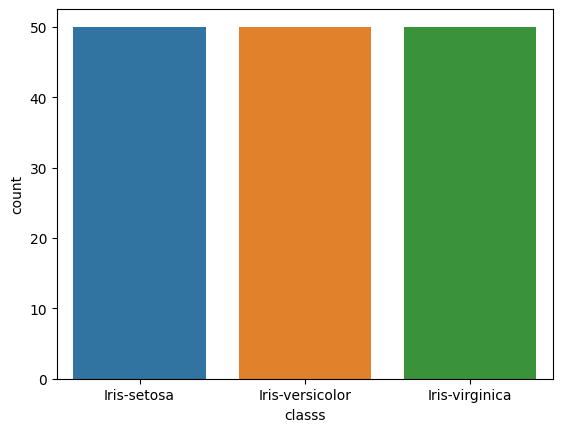

In [ ]:
# importing packages for visualization
import seaborn as sns
import matplotlib.pyplot as plt
 
 
sns.countplot(x='classs', data=df, )
plt.show()

Relation between variables

We will see the relationship between the sepal length and sepal width and also between petal length and petal width.

Example 1: Comparing Sepal Length and Sepal Width

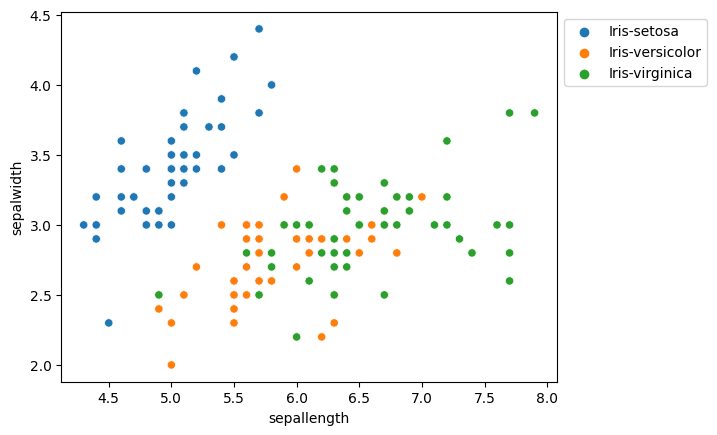

In [ ]:
sns.scatterplot(x='sepallength', y='sepalwidth',hue='classs', data=df, )
 
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

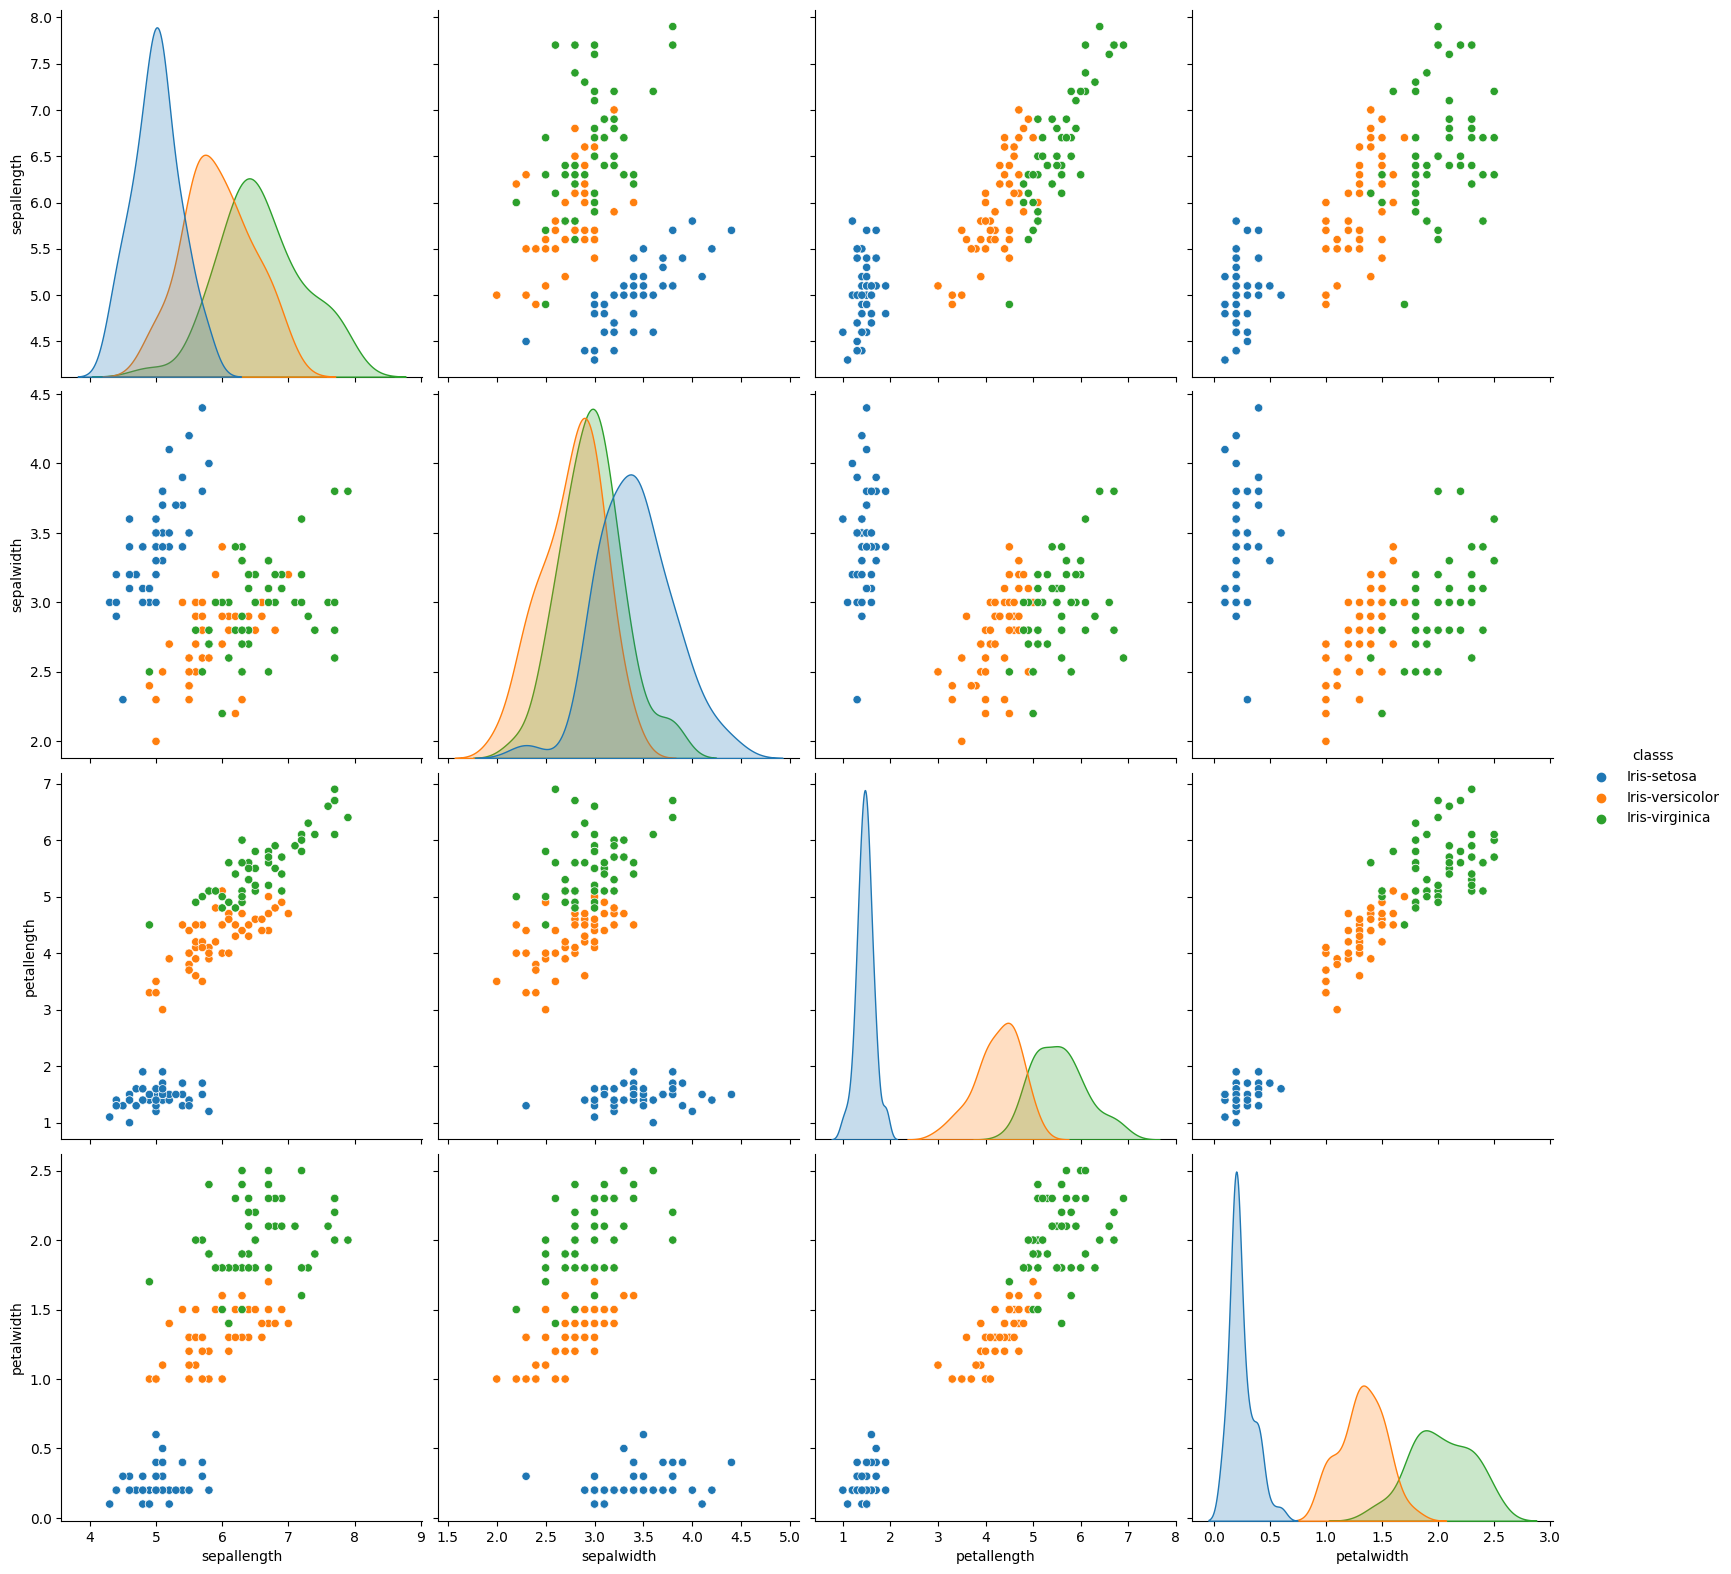

In [ ]:
sns.pairplot(df,hue='classs', height=4)

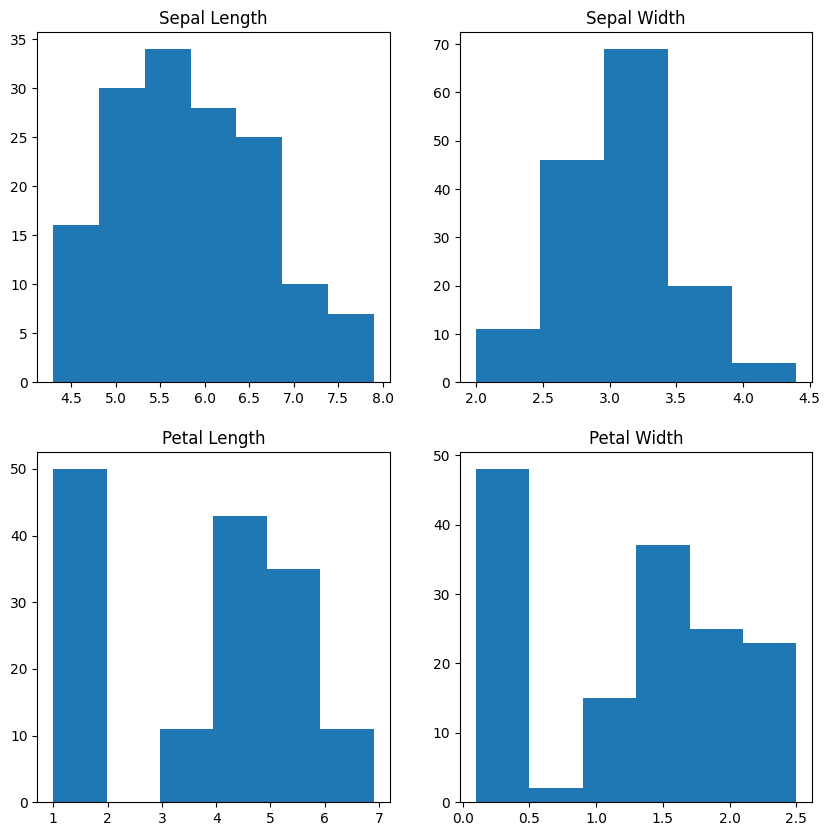

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(10,10))
 
axes[0,0].set_title("Sepal Length")
axes[0,0].hist(df['sepallength'], bins=7)
 
axes[0,1].set_title("Sepal Width")
axes[0,1].hist(df['sepalwidth'], bins=5);
 
axes[1,0].set_title("Petal Length")
axes[1,0].hist(df['petallength'], bins=6);
 
axes[1,1].set_title("Petal Width")
axes[1,1].hist(df['petalwidth'], bins=6);

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages

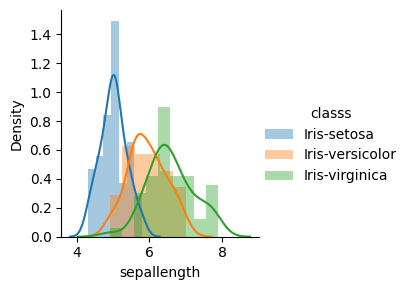

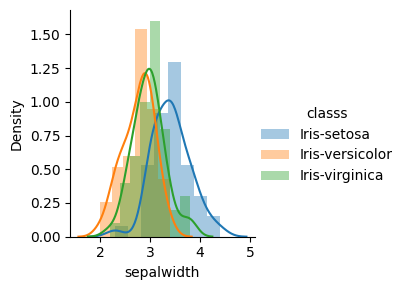

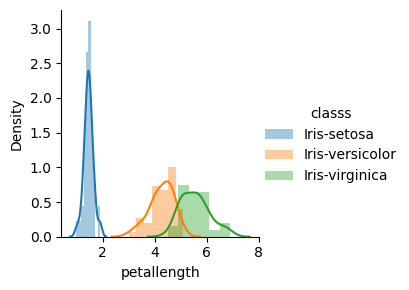

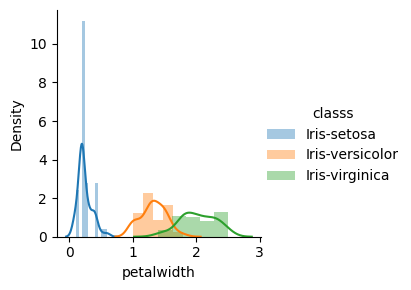

In [ ]:
plot = sns.FacetGrid(df, hue="classs")
plot.map(sns.distplot, "sepallength").add_legend()
 
plot = sns.FacetGrid(df, hue="classs")
plot.map(sns.distplot, "sepalwidth").add_legend()
 
plot = sns.FacetGrid(df, hue="classs")
plot.map(sns.distplot, "petallength").add_legend()
 
plot = sns.FacetGrid(df, hue="classs")
plot.map(sns.distplot, "petalwidth").add_legend()
 
plt.show()

In [ ]:
df.corr(method='pearson')


sepallength  sepalwidth  petallength  petalwidth
sepallength     1.000000   -0.109369     0.871754    0.817954
sepalwidth     -0.109369    1.000000    -0.420516   -0.356544
petallength     0.871754   -0.420516     1.000000    0.962757
petalwidth      0.817954   -0.356544     0.962757    1.000000

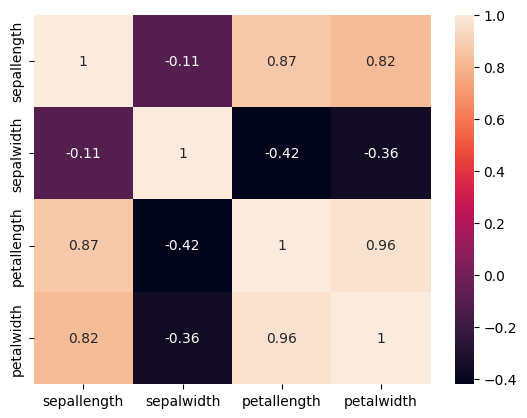

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(method='pearson'),annot = True)
 
plt.show()

In [ ]:
X = df.drop(['classs'],axis=1) 
y=df.classs


In [ ]:

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

print("The Training dataset length: ",len(X_train))
print("The Testing dataset length: ",len(X_test))


The Training dataset length:  105
The Testing dataset length:  45


In [ ]:
try:
    nn = int(input("Enter number of neighbors :"))
    knn = KNeighborsClassifier(nn)
    
    knn.fit(X_train, y_train)
    # to display the score
    print("The Model Score is :",knn.score(X_train, y_train))
    print("The Score is :",knn.score(X_test, y_test))
   
    # To get test data from the user
    test_data = input("Enter Test Data :").split(",")
    for i in range(len(test_data)):
        test_data[i] = float(test_data[i])
        
    print()
    v = knn.predict([test_data])
 
    print("Predicted output is :",v)
except:
    print("Please supply valid input......")


Enter number of neighbors :3
The Model Score is : 0.9523809523809523
The Score is : 0.9777777777777777
Enter Test Data :2.6,2.9,4.6,1.3

Predicted output is : ['Iris-versicolor']


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
